In [1]:
import re
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Rajee/Downloads/EDA folder/googleplaystore.csv')

In [3]:
data.shape

(10841, 13)

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Granularity
- Each row represents one application in google store

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### How many NULL in every column

In [6]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#### How many unique values in every column

In [8]:
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [9]:
categories = ['Category', 'Installs', 'Type', 'Content Rating',
              'Genres', 'Android Ver']
numbers = ['Rating', 'Reviews', 'Installs_numeric', 'Price_numeric']
dates = ['Last Updated']
texts = ['App']
locations = []

In [10]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [11]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [12]:
#data['Installs_numeric'] = data['Installs'].apply(
 #   lambda v: re.sub('[^0-9]', '', v)).replace('', None).astype(int)

In [13]:
data['Installs_numeric'] = data['Installs'].apply(lambda v: re.sub('[^0-9]', '', v))
data['Installs_numeric'] = pd.to_numeric(data['Installs_numeric'], errors='coerce')

In [14]:
data['Price_numeric'] = data['Price'].apply(lambda v: re.sub('[^0-9\.]', '', v))
data['Price_numeric'] =  pd.to_numeric(data['Price_numeric'], errors='coerce')

In [15]:
data['Installs_numeric'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [16]:
data['Price_numeric'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

### Descriptive Statistics

In [17]:
data.describe()

,Rating,Installs_numeric,Price_numeric
count,9367.000000,1.084000e+04,10840.000000
mean,4.193338,1.546434e+07,1.027368
std,0.537431,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,19.000000,1.000000e+09,400.000000


In [18]:
data[numbers].describe()

,Rating,Installs_numeric,Price_numeric
count,9367.000000,1.084000e+04,10840.000000
mean,4.193338,1.546434e+07,1.027368
std,0.537431,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,19.000000,1.000000e+09,400.000000


In [19]:
data[categories].describe()

,Category,Installs,Type,Content Rating,Genres,Android Ver
count,10841,10841,10840,10840,10841,10838
unique,34,22,3,6,120,33
top,FAMILY,"1,000,000+",Free,Everyone,Tools,4.1 and up
freq,1972,1579,10039,8714,842,2451


In [20]:
data['Last Updated'].describe()

count              10841
unique              1378
top       August 3, 2018
freq                 326
Name: Last Updated, dtype: object

In [21]:
#Check for breakup in each of the categorical column
data.Category.value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

<Axes: xlabel='Category'>

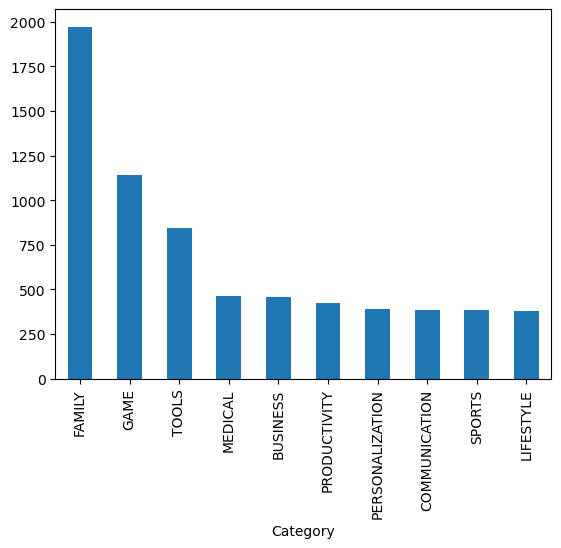

In [22]:
data.Category.value_counts().head(10).plot.bar()

In [23]:
data.Installs.value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [24]:
data['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [25]:
top = data[((data.Category=='FAMILY')|(data.Category=='GAME'))&
           ((data.Installs=='1,000,000+')|(data.Installs=='10,000,000+'))]

In [26]:
top.Category.value_counts()

Category
FAMILY    453
GAME      391
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

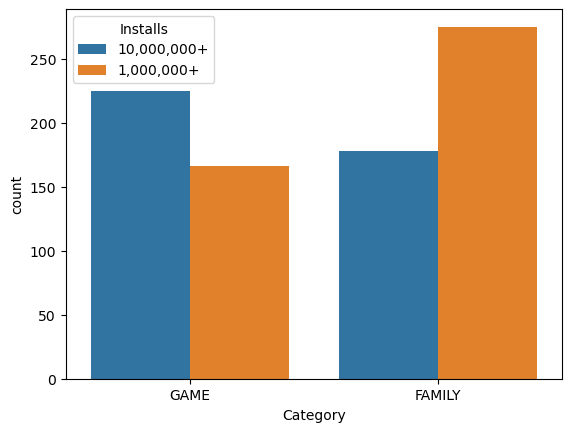

In [27]:
sns.countplot(x=top.Category,hue=top.Installs)

In [28]:
top = data[((data.Category=='FAMILY')|(data.Category=='GAME'))&
           ((data['Content Rating']=='Teen')|(data['Content Rating']=='Mature 17+'))]

<Axes: xlabel='Category', ylabel='count'>

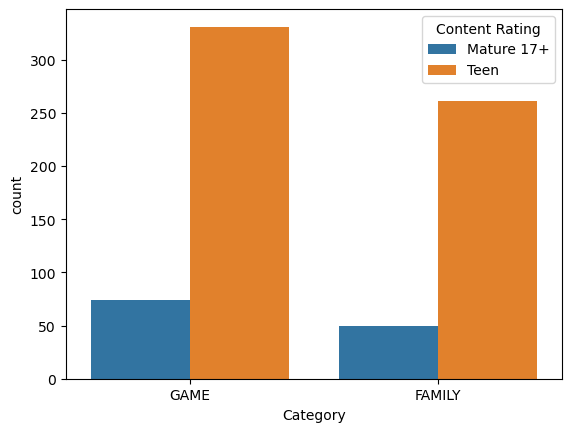

In [29]:
sns.countplot(x=top.Category,hue=top['Content Rating'])

In [30]:
# dealing With Dates

In [31]:
data['Last Updated'].head(10)

0       January 7, 2018
1      January 15, 2018
2        August 1, 2018
3          June 8, 2018
4         June 20, 2018
5        March 26, 2017
6        April 26, 2018
7         June 14, 2018
8    September 20, 2017
9          July 3, 2018
Name: Last Updated, dtype: object

In [32]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'],
                                     format='%B %d, %Y',
                                     errors='coerce')
data['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [33]:
data['Last Updated'].describe()

count                            10840
mean     2017-11-21 06:43:02.435424256
min                2010-05-21 00:00:00
25%                2017-09-20 00:00:00
50%                2018-05-24 00:00:00
75%                2018-07-20 00:00:00
max                2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [34]:
data['Last Updated'].min(), data['Last Updated'].max()

(Timestamp('2010-05-21 00:00:00'), Timestamp('2018-08-08 00:00:00'))

In [35]:
data['Last Updated'].value_counts().head(10)

Last Updated
2018-08-03    326
2018-08-02    304
2018-07-31    294
2018-08-01    285
2018-07-30    211
2018-07-25    164
2018-07-26    161
2018-08-06    158
2018-07-27    151
2018-07-24    148
Name: count, dtype: int64

<Axes: xlabel='Last Updated'>

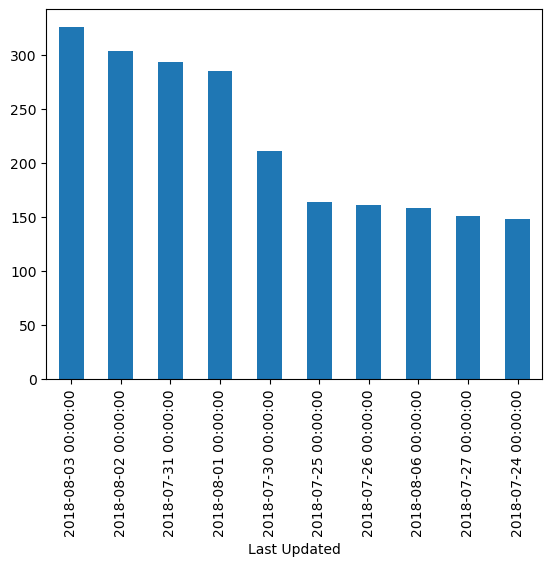

In [36]:
data['Last Updated'].value_counts().head(n=10).plot.bar()

<Axes: xlabel='Last Updated'>

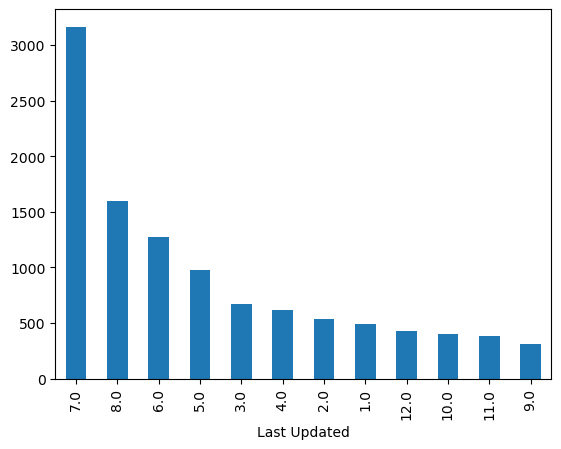

In [37]:
data['Last Updated'].dt.month.value_counts().plot.bar()

<Axes: xlabel='Last Updated'>

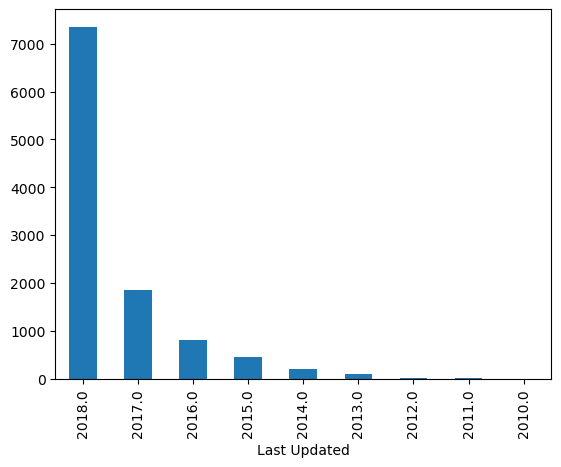

In [38]:
data['Last Updated'].dt.year.value_counts().plot.bar()